In [336]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [337]:
stock_data=yf.download('^NSEBANK',interval='1m',period='1d')

[*********************100%%**********************]  1 of 1 completed


In [338]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-10-10 09:15:00+05:30,51227.750000,51227.750000,51147.199219,51153.550781,51153.550781,0
2024-10-10 09:16:00+05:30,51158.601562,51212.699219,51158.601562,51203.750000,51203.750000,0
2024-10-10 09:17:00+05:30,51201.648438,51202.101562,51126.750000,51167.750000,51167.750000,0
2024-10-10 09:18:00+05:30,51165.851562,51180.550781,51159.300781,51164.148438,51164.148438,0
2024-10-10 09:19:00+05:30,51163.750000,51170.648438,51138.000000,51144.199219,51144.199219,0
...,...,...,...,...,...,...
2024-10-10 13:06:00+05:30,51437.550781,51446.750000,51432.148438,51445.000000,51445.000000,0
2024-10-10 13:07:00+05:30,51444.500000,51445.601562,51430.148438,51439.601562,51439.601562,0
2024-10-10 13:08:00+05:30,51434.750000,51444.648438,51429.601562,51441.351562,51441.351562,0


In [339]:
import math


In [340]:
def black_scholes(S,K,r,T,sigma):
    d1=(math.log(S/K)+(r+sigma**2/2)*T)/(sigma*math.sqrt(T))
    d2=d1-sigma*math.sqrt(T)
    N_prime_0 = 0.4
    C = S*(0.5 + d1*N_prime_0)-K*math.exp(-r*T)*(0.5 + d2*N_prime_0)
    return C

In [341]:
# paramter init
r=0.05 # 5% risk free interset rate (can be calulated through different commudity)
sigma=0.2 #20 percent move last year in nifty
T=1/54 # considering expiry once in a week



In [342]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-10-10 09:15:00+05:30,51227.750000,51227.750000,51147.199219,51153.550781,51153.550781,0
2024-10-10 09:16:00+05:30,51158.601562,51212.699219,51158.601562,51203.750000,51203.750000,0
2024-10-10 09:17:00+05:30,51201.648438,51202.101562,51126.750000,51167.750000,51167.750000,0
2024-10-10 09:18:00+05:30,51165.851562,51180.550781,51159.300781,51164.148438,51164.148438,0
2024-10-10 09:19:00+05:30,51163.750000,51170.648438,51138.000000,51144.199219,51144.199219,0
...,...,...,...,...,...,...
2024-10-10 13:06:00+05:30,51437.550781,51446.750000,51432.148438,51445.000000,51445.000000,0
2024-10-10 13:07:00+05:30,51444.500000,51445.601562,51430.148438,51439.601562,51439.601562,0
2024-10-10 13:08:00+05:30,51434.750000,51444.648438,51429.601562,51441.351562,51441.351562,0


In [343]:
stock_data['20_MA'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Upper_Band']=stock_data['20_MA']+2*stock_data['Close'].rolling(window=20).std()
stock_data['Lower_Band']=stock_data['20_MA']-2*stock_data['Close'].rolling(window=20).std()

In [344]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,20_MA,Upper_Band,Lower_Band
Datetime,,,,,,,,,
2024-10-10 09:15:00+05:30,51227.750000,51227.750000,51147.199219,51153.550781,51153.550781,0,NaN,NaN,NaN
2024-10-10 09:16:00+05:30,51158.601562,51212.699219,51158.601562,51203.750000,51203.750000,0,NaN,NaN,NaN
2024-10-10 09:17:00+05:30,51201.648438,51202.101562,51126.750000,51167.750000,51167.750000,0,NaN,NaN,NaN
2024-10-10 09:18:00+05:30,51165.851562,51180.550781,51159.300781,51164.148438,51164.148438,0,NaN,NaN,NaN
2024-10-10 09:19:00+05:30,51163.750000,51170.648438,51138.000000,51144.199219,51144.199219,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-10-10 13:06:00+05:30,51437.550781,51446.750000,51432.148438,51445.000000,51445.000000,0,51432.144922,51462.659134,51401.630710
2024-10-10 13:07:00+05:30,51444.500000,51445.601562,51430.148438,51439.601562,51439.601562,0,51432.372461,51463.045364,51401.699557
2024-10-10 13:08:00+05:30,51434.750000,51444.648438,51429.601562,51441.351562,51441.351562,0,51431.905078,51461.673707,51402.136449


In [345]:
# for first 20 min no trade will be taken bcz there is no data to calulate Moving Average for that time.. but can be solve
#by taking period='2d'

In [367]:
initial_capital=1000000000
capital=initial_capital
position=0
buy_price=0
trail_stop_loss=None
sl_percent= 0.02

In [368]:
#will store the record after each second  bcz at the end we have plot it


In [369]:
buy_signals = []
sell_signals = []
capital_history = []

In [370]:
#Heart of Strategy


In [371]:


for i in range(len(stock_data)):
    # Buy signal
    if stock_data['Close'][i]<stock_data['Lower_Band'][i] and position == 0:
        
        buy_price = stock_data['Close'][i]
        
        atm = black_scholes(buy_price, buy_price, r, T, sigma)
        print('Buying price:', atm)
        position = round(capital/atm)
        buy_signals.append(stock_data['Close'][i])
        sell_signals.append(np.nan)
        
        capital=capital-position*atm
        print('Capital after investment:', capital)
        
        # Initialize trailing sl when buying
        trail_stop_loss = buy_price*(1-sl_percent)
    
    # trailing sl
    elif position>0:
        # update trailing stop loss if stock price rises above the buy price
        if stock_data['Close'][i]>buy_price:
            trail_stop_loss = max(trail_stop_loss, stock_data['Close'][i] *(1-sl_percent))
        
        # sell signal based on stop loss or reverting to the mean (exit condition)
        
        if stock_data['Close'][i] > stock_data['20_MA'][i] or(trail_stop_loss is not None and stock_data['Close'][i]<trail_stop_loss):
            sell_price = stock_data['Close'][i]
            atm = black_scholes(sell_price, sell_price, r, T, sigma)
            print('Sell price for stock:', atm)
            
            capital +=position*atm
            print('Capital after trade:',capital)
            
            
            position = 0
            buy_signals.append(np.nan)
            sell_signals.append(stock_data['Close'][i])
            
            # Reset trailing stop loss to None after selling
            trail_stop_loss = None
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)
    else:
        buy_signals.append(np.nan)
        sell_signals.append(np.nan)
    
    # Track capital history
    capital_history.append(capital)


Buying price: 581.8829057444345
Capital after investment: -104.61324965953827
Sell price for stock: 582.3826105072621
Capital after trade: 1000858772.1175003
Buying price: 581.7137052858561
Capital after investment: -17.80650019645691
Sell price for stock: 582.1577344913894
Capital after trade: 1001622739.9066426
Buying price: 583.7375007027222
Capital after investment: -179.06164371967316
Sell price for stock: 584.2576568057157
Capital after trade: 1002515264.8404908


In [372]:
capital_history[-1]

1002515264.8404908

In [373]:
#ploting everything


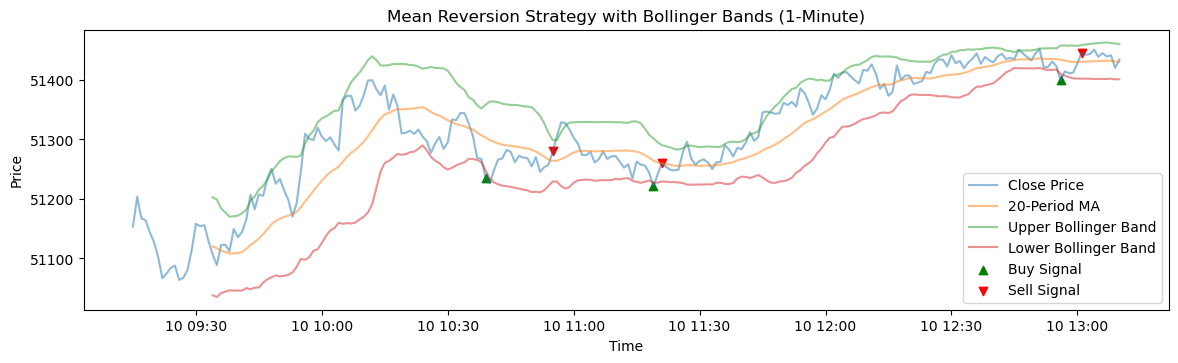

In [374]:
plt.figure(figsize=(14, 8))

# Plot closing price and signals
plt.subplot(2, 1, 1)
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['20_MA'], label='20-Period MA', alpha=0.5)
plt.plot(stock_data['Upper_Band'], label='Upper Bollinger Band', alpha=0.5)
plt.plot(stock_data['Lower_Band'], label='Lower Bollinger Band', alpha=0.5)
plt.scatter(stock_data.index, buy_signals, label='Buy Signal', marker='^', color='green')
plt.scatter(stock_data.index, sell_signals, label='Sell Signal', marker='v', color='red')
plt.title('Mean Reversion Strategy with Bollinger Bands (1-Minute)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')


In [375]:
capital

1002515264.8404908

In [376]:
capital_history[-1]

1002515264.8404908

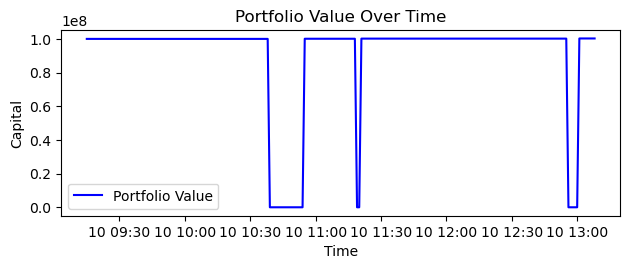

In [329]:
plt.subplot(2, 1, 2)
plt.plot(stock_data.index, capital_history, label='Portfolio Value', color='blue')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time')
plt.ylabel('Capital')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
